In [5]:
import glob
from bs4 import BeautifulSoup
from PIL import Image
import os

In [6]:
xml_files = glob.glob('annotations/*.xml')

In [7]:
def get_soup(filename):
    lines = open(filename).read().splitlines()
    content = ''.join([ line.strip('\t') for line in lines ] )
    return BeautifulSoup(content, 'xml')

In [8]:
output_dir = "output/"
annotations_dir = "annotations"

In [ ]:
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [ ]:
path_list = os.path.splitext(file)
filename = path_list[-2]
ext = path_list[-1]

In [ ]:
path_list

In [ ]:
for file in xml_files:
    basename = os.path.basename(file)
    path_list = os.path.splitext(basename)
    filename = path_list[0]
    
    soup = get_soup(file)
    path = os.path.join(annotations_dir, soup.find('filename').get_text())
    image = Image.open(path)
    tables = soup.find_all('bndbox')
    for index, table in enumerate(tables):
        coords = map(int, table.find_all(text=True))
        cropped_img = image.crop(coords)
        cropped_img.save(f'{output_dir}{filename}_{index}.jpg', "JPEG", quality=80, optimize=True, progressive=True)

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 35]

In [10]:
def plot(img):
    plt.imshow(img)
    plt.show()

In [11]:
img_files = glob.glob('output/*.jpg')

In [ ]:
import cv2
import numpy as np

# Load the image
original = cv2.imread(img_files[9])
img = cv2.bitwise_not(original)
kernel = np.ones((5,5),np.float32)
img = cv2.dilate(img,kernel,iterations = 1)
# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,1)
# thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps - change iteration to detect more or less area's
thresh = cv2.dilate(thresh, (15,15),iterations = 8)
thresh = cv2.erode(thresh,(5,5),iterations = 5)

# Find the contours
# image,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

mser = cv2.MSER_create()
msers, bboxes	=	mser.detectRegions(	thresh	)
contours = msers
# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#     cv2.rectangle(original,(x,y),(x+w,y+h),(0,255,0),2)
#     cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
# cv2.imshow('img',img)
# cv2.imshow('res',thresh_color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plot(img)

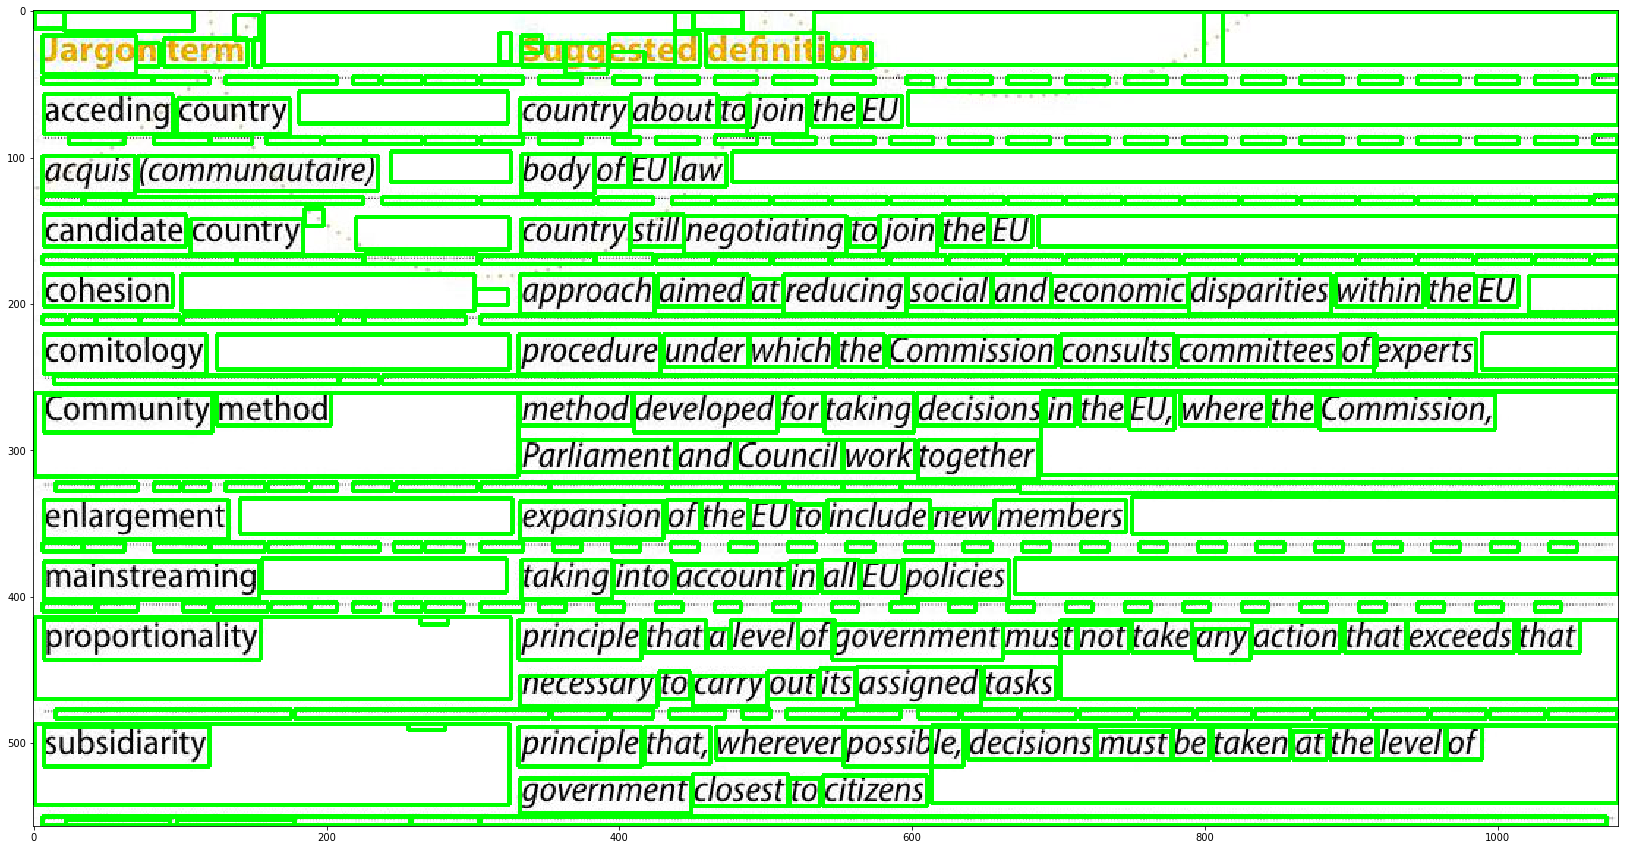

In [48]:
plot(original)

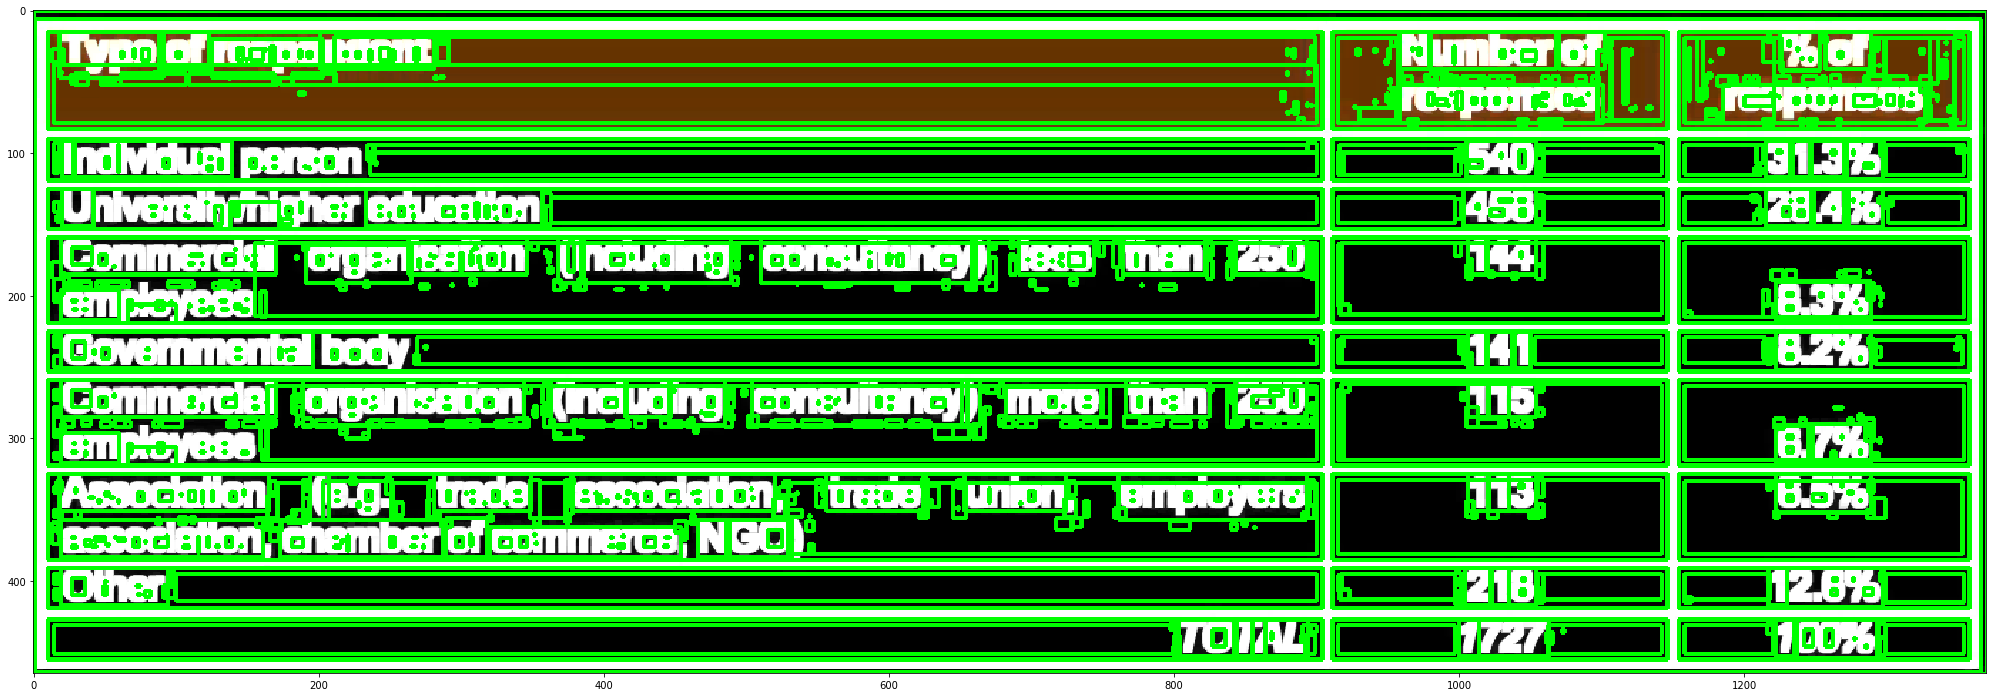

In [56]:
import cv2
import numpy as np

# Load the image
original = cv2.imread(img_files[17])
# img = original[:,:,::-1]
img = cv2.bitwise_not(original)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.float32)
img = cv2.dilate(img,kernel,iterations = 1)
# convert to grayscale
# img = img[:,:,::-1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
# gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,1)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps - change iteration to detect more or less area's
thresh = cv2.dilate(thresh, (8,8),iterations = 1)
thresh = cv2.erode(thresh,(5,5),iterations = 1)

# Find the contours
image,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# mser = cv2.MSER_create()
# msers, bboxes	=	mser.detectRegions(	thresh	)
# contours = msers
# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,255,0),2)
#     cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
# cv2.imshow('img',img)
# cv2.imshow('res',thresh_color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plot(img)

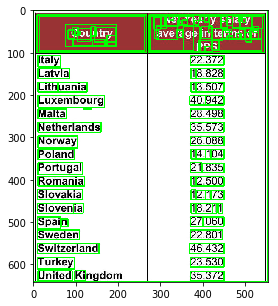

In [14]:
for cnt in bboxes:
    x,y,w,h = cnt
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,255,0),2)

plot(original)

In [51]:
x = bboxes[:, 0]

In [52]:
y = bboxes[:, 1]

In [53]:
plt.rcParams['figure.figsize'] = [35, 15]

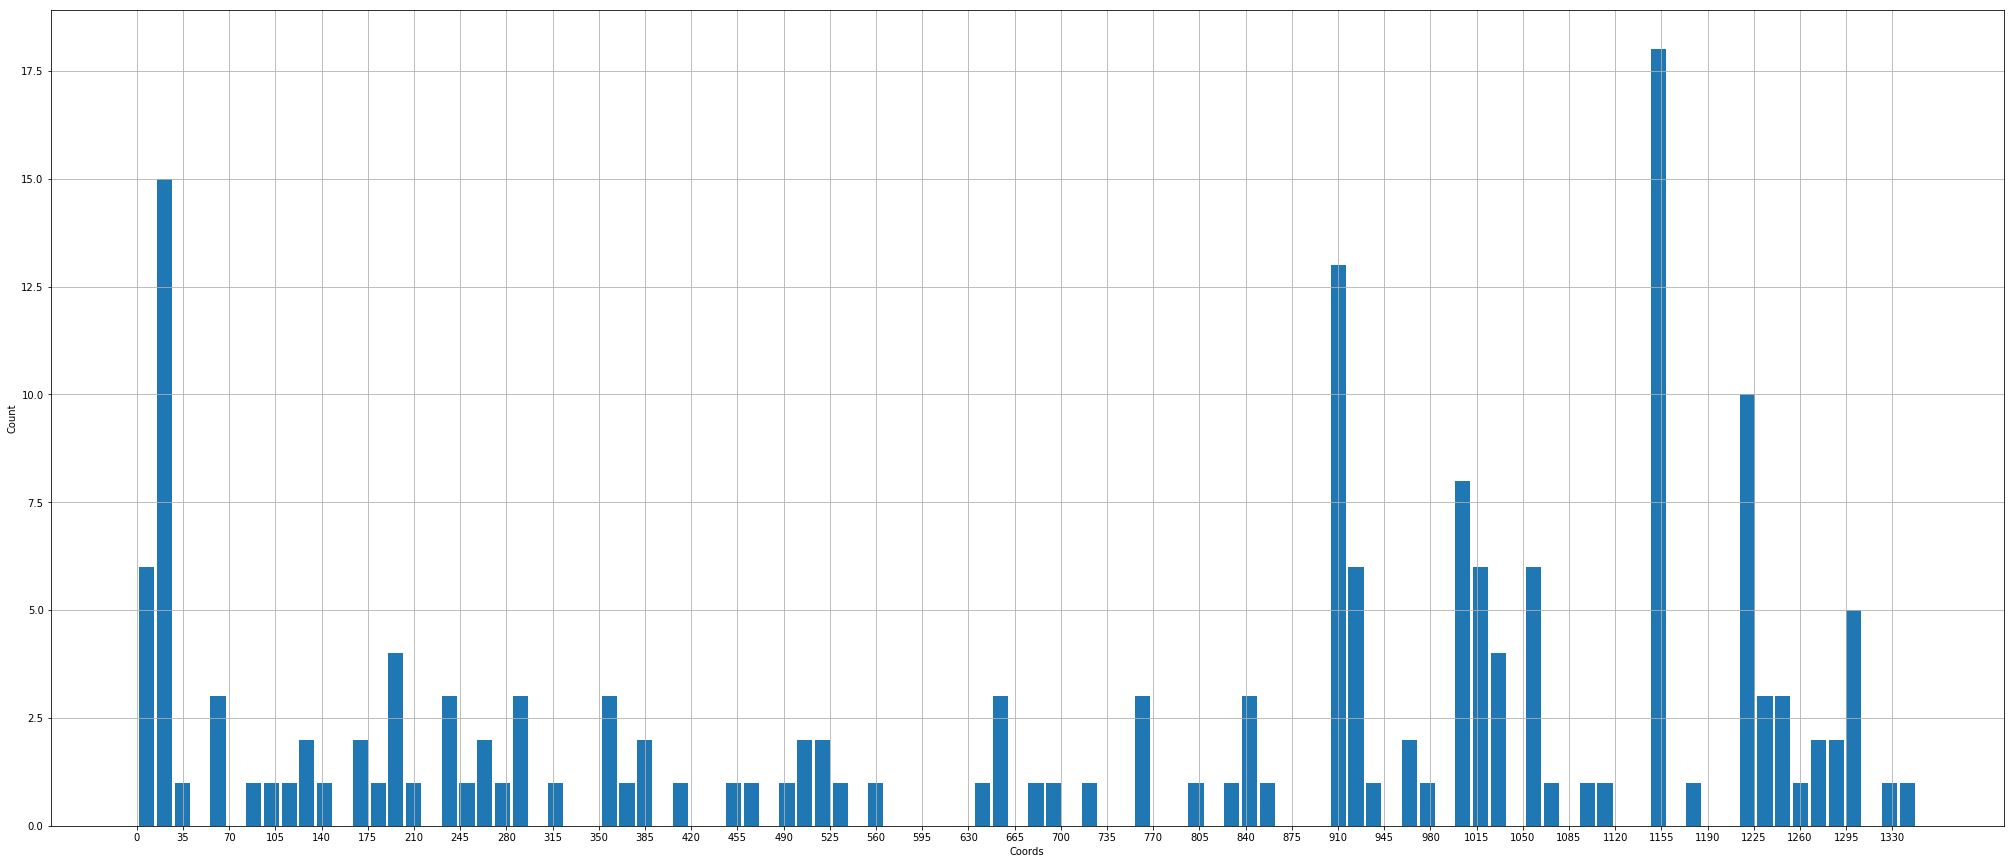

In [54]:
n, bins, patches = plt.hist(x,bins=100, rwidth=0.85)
plt.xlabel('Coords')
plt.ylabel('Count')
plt.grid(True)
# plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, max(x), 35))
plt.show()

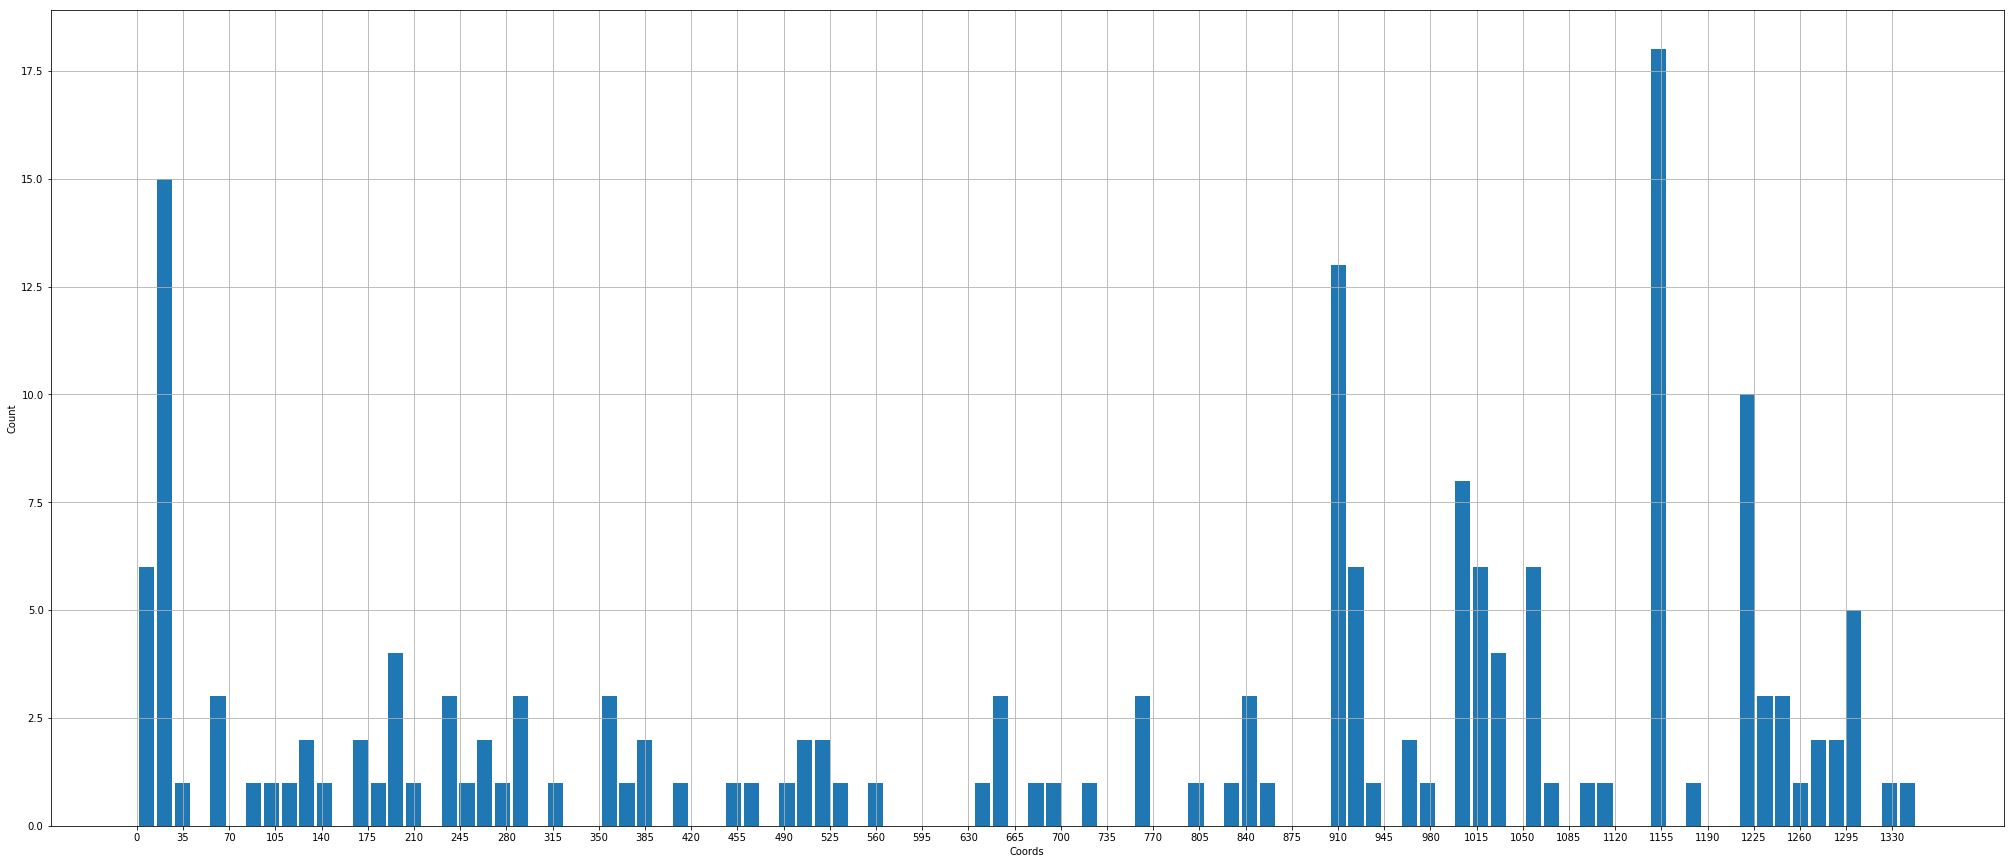

In [55]:
n, bins, patches = plt.hist(x,bins=100, rwidth=0.85)
plt.xlabel('Coords')
plt.ylabel('Count')
plt.grid(True)
# plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, max(x), 35))
plt.show()

In [ ]:
n, bins, patches = plt.hist(y,bins=100, rwidth=0.85)
plt.xlabel('Coords')
plt.ylabel('Count')
plt.grid(True)
# plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, max(y), 35))
plt.show()